### In this notebook, we create a non-fire dataset with class 0. For this we only shift the date of each fire in fire dataset by 30 days backwards. We apply same things to this dataset we did for fire dataset. Before this please go to the notebook Fire data with class 1. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import datetime, timedelta
import seaborn as sns

C:\Users\slaye\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### merged_df is the dataset where wildfire data and weather stations' location were merged. This can be found in the notebook called Fire data with class 1. Check dataset file. 

In [2]:
merged_df = pd.read_csv('merged_df.csv')
weather_data = pd.read_csv('weather_df.csv')
weather_data.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

C:\Users\slaye\AppData\Local\Temp\ipykernel_828\2831146850.py:2: DtypeWarning: Columns (23,24,29,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_data = pd.read_csv('weather_df.csv')


In [3]:
merged_df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [4]:
merged_df

,FID,SRC_AGENCY,LATITUDE,LONGITUDE,REP_DATE,SIZE_HA,CAUSE,PROTZONE,ECOZ_NAME,Location,FireLocation,WeatherLocation,Location2
0,328420,QC,52.5747,-76.5213,2019-07-01,408.5,L,nordique,Hudson Plain,"52.5747,-76.52129999999998","(52.5747, -76.52129999999998)","53.625277777777775, -77.70416666666667","53.625277777777775,-77.70416666666667"
1,328421,QC,52.5730,-76.5418,2019-07-01,34.5,L,nordique,Hudson Plain,"52.573,-76.54179999999998","(52.573, -76.54179999999998)","53.625277777777775, -77.70416666666667","53.625277777777775,-77.70416666666667"
2,328422,QC,50.9285,-78.0518,2019-07-01,141.9,L,nordique,Hudson Plain,"50.9285,-78.0518","(50.9285, -78.0518)","51.473333333333336, -78.75833333333334","51.473333333333336,-78.75833333333334"
3,328423,QC,52.6186,-76.6953,2018-06-28,3096.0,L,nordique,Hudson Plain,"52.6186,-76.6953","(52.6186, -76.6953)","53.625277777777775, -77.70416666666667","53.625277777777775,-77.70416666666667"
4,328427,QC,52.7987,-77.3304,2018-07-05,6.3,L,nordique,Taiga Shield East,"52.7987,-77.33039999999998","(52.7987, -77.33039999999998)","53.625277777777775, -77.70416666666667","53.625277777777775,-77.70416666666667"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,371479,QC,49.3493,-72.6934,2021-08-26,0.0,L,intensive,Boreal Shield East,"49.3493,-72.69339999999998","(49.3493, -72.69339999999998)","48.84166666666667, -72.54694444444445","48.84166666666667,-72.54694444444445"
1082,371481,QC,46.8596,-79.0626,2021-08-29,0.0,L,intensive,Boreal Shield East,"46.8596,-79.0626","(46.8596, -79.0626)","46.70972222222223, -79.10111111111111","46.70972222222223,-79.10111111111111"
1083,371503,QC,48.7468,-72.6749,2021-09-06,0.0,L,intensive,Boreal Shield East,"48.7468,-72.67489999999998","(48.7468, -72.67489999999998)","48.84166666666667, -72.54694444444445","48.84166666666667,-72.54694444444445"
1084,371521,QC,49.5292,-68.6923,2021-09-13,0.1,L,intensive,Boreal Shield East,"49.5292,-68.6923","(49.5292, -68.6923)","49.11666666666667, -68.38333333333334","49.11666666666667,-68.38333333333334"


### This function finds nth day before a given date. 

In [5]:
def day_before(myDateStr,n):
    #converting to datetime 
    date = pd.to_datetime(myDateStr)
    newdate = date - timedelta(days=n)
    
    return newdate

### Here we replace the dates with the 30th day before the dates. 

In [6]:
for i in range(int(len(merged_df))):
    merged_df.replace(merged_df.iloc[i]['REP_DATE'],day_before(merged_df.iloc[i]['REP_DATE'],30),inplace =True)

In [7]:
merged_df.drop("Location2",axis=1,inplace=True)

In [8]:
merged_df.drop(columns = 'Location', axis =1, inplace=True)

In [9]:
merged_df_new = pd.DataFrame(np.repeat(merged_df.values, 15, axis=0))
merged_df_new.columns = merged_df.columns
merged_df_new

,FID,SRC_AGENCY,LATITUDE,LONGITUDE,REP_DATE,SIZE_HA,CAUSE,PROTZONE,ECOZ_NAME,FireLocation,WeatherLocation
0,328420,QC,52.5747,-76.5213,2019-06-01,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)","53.625277777777775, -77.70416666666667"
1,328420,QC,52.5747,-76.5213,2019-06-01,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)","53.625277777777775, -77.70416666666667"
2,328420,QC,52.5747,-76.5213,2019-06-01,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)","53.625277777777775, -77.70416666666667"
3,328420,QC,52.5747,-76.5213,2019-06-01,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)","53.625277777777775, -77.70416666666667"
4,328420,QC,52.5747,-76.5213,2019-06-01,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)","53.625277777777775, -77.70416666666667"
...,...,...,...,...,...,...,...,...,...,...,...
16285,371525,QC,47.0126,-71.5198,2021-09-02,0.7,L,intensive,Boreal Shield East,"(47.0126, -71.5198)","46.90277777777778, -71.50361111111111"
16286,371525,QC,47.0126,-71.5198,2021-09-02,0.7,L,intensive,Boreal Shield East,"(47.0126, -71.5198)","46.90277777777778, -71.50361111111111"
16287,371525,QC,47.0126,-71.5198,2021-09-02,0.7,L,intensive,Boreal Shield East,"(47.0126, -71.5198)","46.90277777777778, -71.50361111111111"
16288,371525,QC,47.0126,-71.5198,2021-09-02,0.7,L,intensive,Boreal Shield East,"(47.0126, -71.5198)","46.90277777777778, -71.50361111111111"


### As we did for fire dataset, we consider 15 days before the non-fire dataset. 

In [10]:
def days15(myDateStr):
    datelist=[]
    #converting to datetime 
    date = pd.to_datetime(myDateStr)
    #loop to create 15 datetimes
    for i in range(15):
        newdate = date - timedelta(days=i)
    #adding new dates to the list
        datelist.append(newdate)
    return datelist

In [11]:
start = 0
end = 14
for j in range(len(merged_df)):
    date = pd.to_datetime(merged_df['REP_DATE'][j])
    new_dates = days15(date)
    merged_df_new['REP_DATE'][start:end+1] = new_dates
    start=start+15
    end=end+15
merged_df_new    

C:\Users\slaye\AppData\Local\Temp\ipykernel_828\3185150954.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_new['REP_DATE'][start:end+1] = new_dates


,FID,SRC_AGENCY,LATITUDE,LONGITUDE,REP_DATE,SIZE_HA,CAUSE,PROTZONE,ECOZ_NAME,FireLocation,WeatherLocation
0,328420,QC,52.5747,-76.5213,2019-06-01,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)","53.625277777777775, -77.70416666666667"
1,328420,QC,52.5747,-76.5213,2019-05-31,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)","53.625277777777775, -77.70416666666667"
2,328420,QC,52.5747,-76.5213,2019-05-30,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)","53.625277777777775, -77.70416666666667"
3,328420,QC,52.5747,-76.5213,2019-05-29,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)","53.625277777777775, -77.70416666666667"
4,328420,QC,52.5747,-76.5213,2019-05-28,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)","53.625277777777775, -77.70416666666667"
...,...,...,...,...,...,...,...,...,...,...,...
16285,371525,QC,47.0126,-71.5198,2021-08-23,0.7,L,intensive,Boreal Shield East,"(47.0126, -71.5198)","46.90277777777778, -71.50361111111111"
16286,371525,QC,47.0126,-71.5198,2021-08-22,0.7,L,intensive,Boreal Shield East,"(47.0126, -71.5198)","46.90277777777778, -71.50361111111111"
16287,371525,QC,47.0126,-71.5198,2021-08-21,0.7,L,intensive,Boreal Shield East,"(47.0126, -71.5198)","46.90277777777778, -71.50361111111111"
16288,371525,QC,47.0126,-71.5198,2021-08-20,0.7,L,intensive,Boreal Shield East,"(47.0126, -71.5198)","46.90277777777778, -71.50361111111111"


In [12]:
weather_df = weather_data
weather_df['LOCAL_DATE']=pd.to_datetime(weather_df['LOCAL_DATE'])
weather_df

,x,y,MAX_REL_HUMIDITY,TOTAL_SNOW_FLAG,LOCAL_DAY,DIRECTION_MAX_GUST,ID,MEAN_TEMPERATURE,MIN_REL_HUMIDITY,SNOW_ON_GROUND_FLAG,...,COOLING_DEGREE_DAYS_FLAG,LOCAL_YEAR,MAX_REL_HUMIDITY_FLAG,LOCAL_DATE,TOTAL_SNOW,MIN_TEMPERATURE,SPEED_MAX_GUST_FLAG,DIRECTION_MAX_GUST_FLAG,MAX_TEMPERATURE_FLAG,SNOW_ON_GROUND
0,-135.005833,68.223333,NaN,NaN,2,NaN,2200100.2012.8.2,19.2,NaN,NaN,...,NaN,2012,NaN,2012-08-02,0.0,16.0,NaN,NaN,NaN,0.0
1,-135.005833,68.223333,NaN,NaN,4,NaN,2200100.2012.8.4,16.2,NaN,NaN,...,NaN,2012,NaN,2012-08-04,0.0,11.5,NaN,NaN,NaN,0.0
2,-135.005833,68.223333,NaN,NaN,5,NaN,2200100.2012.8.5,16.3,NaN,NaN,...,NaN,2012,NaN,2012-08-05,0.0,11.0,NaN,NaN,NaN,0.0
3,-135.005833,68.223333,NaN,NaN,6,NaN,2200100.2012.8.6,17.3,NaN,NaN,...,NaN,2012,NaN,2012-08-06,0.0,10.5,NaN,NaN,NaN,0.0
4,-135.005833,68.223333,NaN,NaN,7,NaN,2200100.2012.8.7,13.8,NaN,NaN,...,NaN,2012,NaN,2012-08-07,0.0,11.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745008,-76.050000,46.066667,NaN,T,26,NaN,7038975.2021.11.26,NaN,NaN,NaN,...,NaN,2021,NaN,2021-11-26,0.0,-4.0,NaN,NaN,NaN,0.0
745009,-76.050000,46.066667,NaN,NaN,27,NaN,7038975.2021.11.27,NaN,NaN,NaN,...,NaN,2021,NaN,2021-11-27,0.0,-9.0,NaN,NaN,NaN,0.0
745010,-76.050000,46.066667,NaN,NaN,28,NaN,7038975.2021.11.28,NaN,NaN,NaN,...,NaN,2021,NaN,2021-11-28,0.0,-15.2,NaN,NaN,NaN,0.0
745011,-76.050000,46.066667,NaN,NaN,29,NaN,7038975.2021.11.29,NaN,NaN,NaN,...,NaN,2021,NaN,2021-11-29,2.0,-10.4,NaN,NaN,NaN,0.0


In [13]:
merged_df_new=merged_df_new.assign(WeatherLocation = lambda df : df['WeatherLocation'].str.replace(' ',''))
merged_df_new

,FID,SRC_AGENCY,LATITUDE,LONGITUDE,REP_DATE,SIZE_HA,CAUSE,PROTZONE,ECOZ_NAME,FireLocation,WeatherLocation
0,328420,QC,52.5747,-76.5213,2019-06-01,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)","53.625277777777775,-77.70416666666667"
1,328420,QC,52.5747,-76.5213,2019-05-31,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)","53.625277777777775,-77.70416666666667"
2,328420,QC,52.5747,-76.5213,2019-05-30,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)","53.625277777777775,-77.70416666666667"
3,328420,QC,52.5747,-76.5213,2019-05-29,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)","53.625277777777775,-77.70416666666667"
4,328420,QC,52.5747,-76.5213,2019-05-28,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)","53.625277777777775,-77.70416666666667"
...,...,...,...,...,...,...,...,...,...,...,...
16285,371525,QC,47.0126,-71.5198,2021-08-23,0.7,L,intensive,Boreal Shield East,"(47.0126, -71.5198)","46.90277777777778,-71.50361111111111"
16286,371525,QC,47.0126,-71.5198,2021-08-22,0.7,L,intensive,Boreal Shield East,"(47.0126, -71.5198)","46.90277777777778,-71.50361111111111"
16287,371525,QC,47.0126,-71.5198,2021-08-21,0.7,L,intensive,Boreal Shield East,"(47.0126, -71.5198)","46.90277777777778,-71.50361111111111"
16288,371525,QC,47.0126,-71.5198,2021-08-20,0.7,L,intensive,Boreal Shield East,"(47.0126, -71.5198)","46.90277777777778,-71.50361111111111"


In [14]:
weather_df['Location'] = weather_df['y'].astype(str) + ',' + weather_df['x'].astype(str)

In [15]:
weather_df = weather_df.rename(columns={"Location": "WeatherLocation", "LOCAL_DATE": "REP_DATE"})

### We merge non-fire dataset with weather dataset. 

In [16]:
merged_df2=merged_df_new.merge(weather_df, how = 'left', on = ['WeatherLocation','REP_DATE'])
merged_df2

,FID,SRC_AGENCY,LATITUDE,LONGITUDE,REP_DATE,SIZE_HA,CAUSE,PROTZONE,ECOZ_NAME,FireLocation,...,MAX_TEMPERATURE,COOLING_DEGREE_DAYS_FLAG,LOCAL_YEAR,MAX_REL_HUMIDITY_FLAG,TOTAL_SNOW,MIN_TEMPERATURE,SPEED_MAX_GUST_FLAG,DIRECTION_MAX_GUST_FLAG,MAX_TEMPERATURE_FLAG,SNOW_ON_GROUND
0,328420,QC,52.5747,-76.5213,2019-06-01,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)",...,6.0,NaN,2019.0,NaN,0.0,-3.4,M,NaN,NaN,NaN
1,328420,QC,52.5747,-76.5213,2019-05-31,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)",...,8.1,NaN,2019.0,NaN,0.0,-3.7,NaN,NaN,NaN,NaN
2,328420,QC,52.5747,-76.5213,2019-05-30,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)",...,5.7,NaN,2019.0,NaN,0.0,-2.2,M,M,NaN,NaN
3,328420,QC,52.5747,-76.5213,2019-05-29,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)",...,3.8,NaN,2019.0,NaN,2.0,-2.2,NaN,NaN,NaN,0.0
4,328420,QC,52.5747,-76.5213,2019-05-28,408.5,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)",...,16.9,NaN,2019.0,NaN,0.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16934,371525,QC,47.0126,-71.5198,2021-08-23,0.7,L,intensive,Boreal Shield East,"(47.0126, -71.5198)",...,25.5,NaN,2021.0,NaN,NaN,18.7,M,M,NaN,NaN
16935,371525,QC,47.0126,-71.5198,2021-08-22,0.7,L,intensive,Boreal Shield East,"(47.0126, -71.5198)",...,29.3,NaN,2021.0,NaN,NaN,16.9,NaN,NaN,NaN,NaN
16936,371525,QC,47.0126,-71.5198,2021-08-21,0.7,L,intensive,Boreal Shield East,"(47.0126, -71.5198)",...,30.4,NaN,2021.0,NaN,NaN,17.4,M,M,NaN,NaN
16937,371525,QC,47.0126,-71.5198,2021-08-20,0.7,L,intensive,Boreal Shield East,"(47.0126, -71.5198)",...,32.9,NaN,2021.0,NaN,NaN,16.3,M,M,NaN,NaN


### Here we have missing values for non-fire dataset merged with weather data. Yellows represent missing values. 

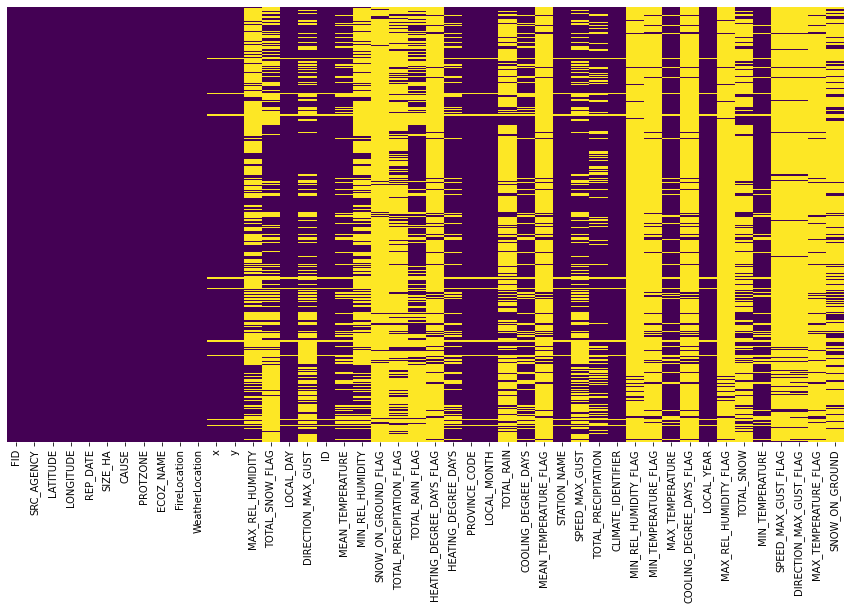

In [17]:
plt.figure(figsize=(15,8))
ax =sns.heatmap(merged_df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

### Here we show missing values in percentages. 

In [18]:
percent_missing = merged_df2.isnull().sum() * 100 / len(merged_df2)
missing_value_df = pd.DataFrame({'column_name': merged_df2.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

In [19]:
missing_value_df

,column_name,percent_missing
FID,FID,0.000000
WeatherLocation,WeatherLocation,0.000000
ECOZ_NAME,ECOZ_NAME,0.000000
PROTZONE,PROTZONE,0.000000
CAUSE,CAUSE,0.000000
FireLocation,FireLocation,0.000000
REP_DATE,REP_DATE,0.000000
LONGITUDE,LONGITUDE,0.000000
LATITUDE,LATITUDE,0.000000
SRC_AGENCY,SRC_AGENCY,0.000000


### As for the fire dataset, we only consider rows with good amount of weather data. For us it is more than 8. 

In [20]:
fid_list = merged_df2[(merged_df2['MIN_REL_HUMIDITY'].isna() == False) &
            (merged_df2['MAX_REL_HUMIDITY'].isna() == False) &
            (merged_df2['MAX_TEMPERATURE'].isna()==False) &
           (merged_df2['MIN_TEMPERATURE'].isna()==False) &
           (merged_df2['DIRECTION_MAX_GUST'].isna()==False) &
           (merged_df2['SPEED_MAX_GUST'].isna()==False)]['FID'].unique()
fid_15_list=[]
for fid in fid_list:
    if len(merged_df2[(merged_df2['MIN_REL_HUMIDITY'].isna() == False) &
            (merged_df2['MAX_REL_HUMIDITY'].isna() == False) &
            (merged_df2['MAX_TEMPERATURE'].isna()==False) &
           (merged_df2['MIN_TEMPERATURE'].isna()==False) &
           (merged_df2['DIRECTION_MAX_GUST'].isna()==False) &
           (merged_df2['SPEED_MAX_GUST'].isna()==False) &
              (merged_df2['FID']==fid)])>8:
        fid_15_list.append(fid)

In [21]:
len(fid_15_list) #There are only 271 non-fire data available for modeling. 

271

In [22]:
to_remove_index=[]
for index in merged_df2.index:
    if merged_df2.loc[index]['FID'] not in fid_15_list:
        to_remove_index.append(index)

In [23]:
merged_df2.drop(to_remove_index, inplace=True)

In [24]:
def Fire_ID_counter(df):
    FID_number=[]
    l=list(df['FID'])
    d=dict((i, l.count(i)) for i in l)
    FID_gt_15=[]
    for i in range(len(d)):
        value = d[list(d.keys())[i]] 
        if value != 15:
            FID_gt_15.append(list(d.keys())[i])
    for FID in FID_gt_15: 
        FID_number.append((FID,merged_df2[merged_df2['FID']==FID].duplicated().value_counts()))
    if len(FID_number)>0:
        return FID_number
    else:
        return ["No repeated Fire ID"]

In [25]:
merged_df2.drop_duplicates(subset=['FID', 'REP_DATE'],inplace=True)

In [26]:
Fire_ID_counter(merged_df2)

['No repeated Fire ID']

### Since these are non-fire datas, size of them should be 0. 

In [27]:
for ind in merged_df2.index:
    merged_df2['SIZE_HA'].loc[ind]=0.0
merged_df2

C:\Users\slaye\AppData\Local\Temp\ipykernel_828\764568617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2['SIZE_HA'].loc[ind]=0.0


,FID,SRC_AGENCY,LATITUDE,LONGITUDE,REP_DATE,SIZE_HA,CAUSE,PROTZONE,ECOZ_NAME,FireLocation,...,MAX_TEMPERATURE,COOLING_DEGREE_DAYS_FLAG,LOCAL_YEAR,MAX_REL_HUMIDITY_FLAG,TOTAL_SNOW,MIN_TEMPERATURE,SPEED_MAX_GUST_FLAG,DIRECTION_MAX_GUST_FLAG,MAX_TEMPERATURE_FLAG,SNOW_ON_GROUND
0,328420,QC,52.5747,-76.5213,2019-06-01,0.0,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)",...,6.0,NaN,2019.0,NaN,0.0,-3.4,M,NaN,NaN,NaN
1,328420,QC,52.5747,-76.5213,2019-05-31,0.0,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)",...,8.1,NaN,2019.0,NaN,0.0,-3.7,NaN,NaN,NaN,NaN
2,328420,QC,52.5747,-76.5213,2019-05-30,0.0,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)",...,5.7,NaN,2019.0,NaN,0.0,-2.2,M,M,NaN,NaN
3,328420,QC,52.5747,-76.5213,2019-05-29,0.0,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)",...,3.8,NaN,2019.0,NaN,2.0,-2.2,NaN,NaN,NaN,0.0
4,328420,QC,52.5747,-76.5213,2019-05-28,0.0,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)",...,16.9,NaN,2019.0,NaN,0.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16904,371503,QC,48.7468,-72.6749,2021-07-28,0.0,L,intensive,Boreal Shield East,"(48.7468, -72.67489999999998)",...,20.9,NaN,2021.0,NaN,NaN,7.1,NaN,NaN,NaN,NaN
16905,371503,QC,48.7468,-72.6749,2021-07-27,0.0,L,intensive,Boreal Shield East,"(48.7468, -72.67489999999998)",...,18.5,NaN,2021.0,NaN,NaN,7.8,NaN,NaN,NaN,NaN
16906,371503,QC,48.7468,-72.6749,2021-07-26,0.0,L,intensive,Boreal Shield East,"(48.7468, -72.67489999999998)",...,22.9,NaN,2021.0,NaN,NaN,11.5,NaN,NaN,NaN,NaN
16907,371503,QC,48.7468,-72.6749,2021-07-25,0.0,L,intensive,Boreal Shield East,"(48.7468, -72.67489999999998)",...,24.2,NaN,2021.0,NaN,NaN,12.8,NaN,NaN,NaN,NaN


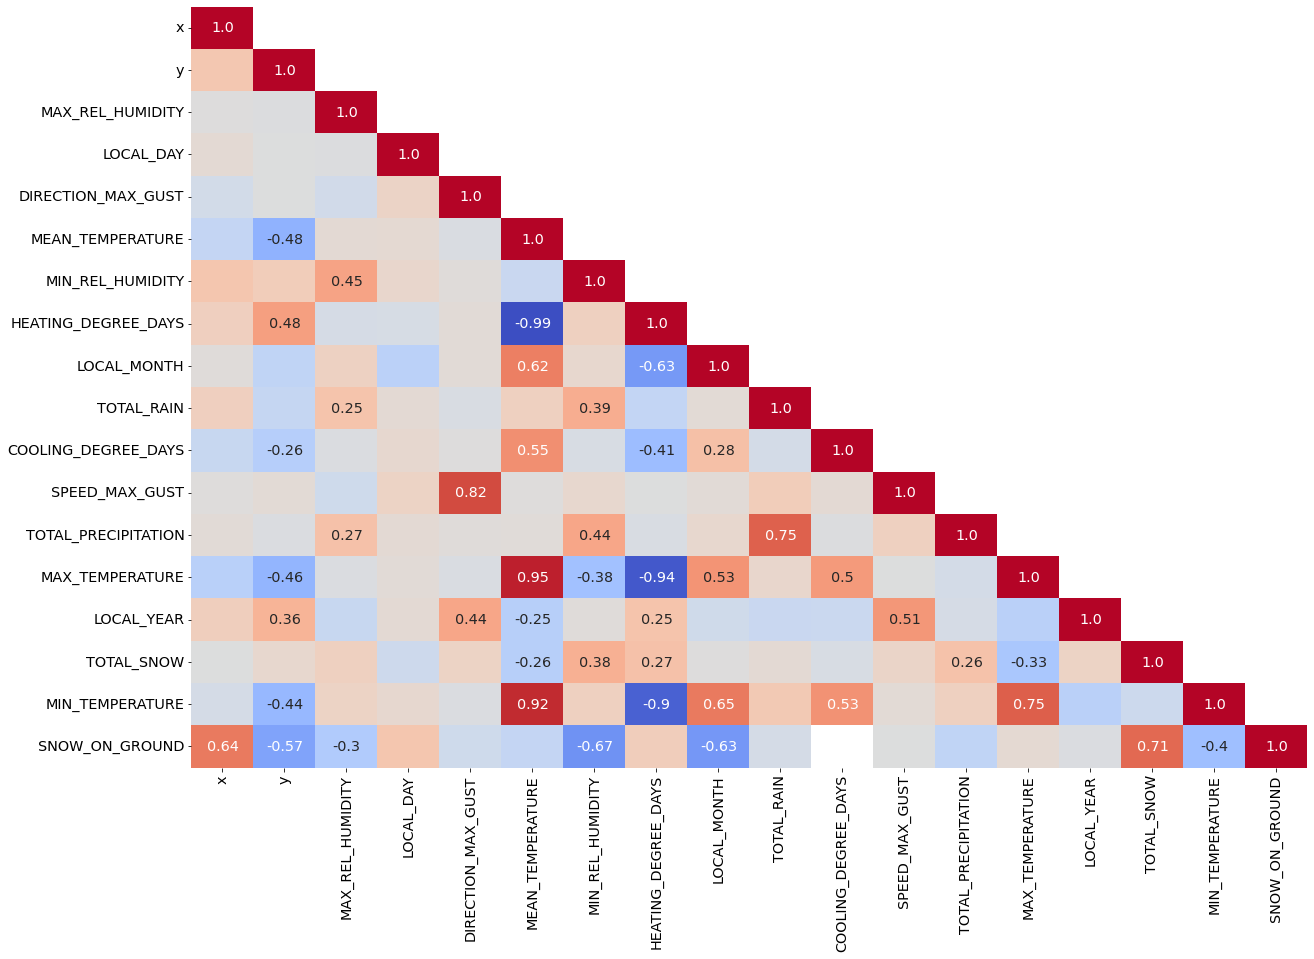

In [28]:
def customized_heatmap(df):
    corr_df = df.corr()
# Get only half portion of corr_df to avoid df, so create mask    
    mask = np.triu(np.ones_like(corr_df), k=1)
    
     
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(corr_df, vmin=-1, vmax=1, cbar=False,
                     cmap='coolwarm', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.25 < t < 0.25:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks( size='x-large')
    plt.yticks(rotation=0, size='x-large')
    #Save fig uncomment first
#     plt.savefig("Heatmap DF")
    plt.show()
customized_heatmap(merged_df2)

In [29]:
column_list = merged_df2.columns.tolist()
flag_list = []
for column in column_list:
    if 'FLAG' in column.split('_'):
        flag_list.append(column)
merged_df2.drop(columns=flag_list, inplace = True)

In [30]:
# We filled Nan's in these columns by 0 because NaN indicates it didn't happen. 
values = {"SNOW_ON_GROUND": 0, "TOTAL_RAIN": 0, "TOTAL_PRECIPITATION": 0, "TOTAL_SNOW": 0}
merged_df2.fillna(value=values, inplace = True)

In [31]:
col_to_be_filled = ['MEAN_TEMPERATURE', 'MIN_TEMPERATURE', 'MAX_TEMPERATURE', 'MIN_REL_HUMIDITY', 'MAX_REL_HUMIDITY', 
                   'SPEED_MAX_GUST','DIRECTION_MAX_GUST']
merged_df3= (
                merged_df2
                .groupby(['FireLocation'])
                .apply(lambda df: df.assign(MEAN_TEMPERATURE= lambda x: np.where(x.MEAN_TEMPERATURE.isna(), 
                                                                                 np.mean(x.MEAN_TEMPERATURE), 
                                                                                 x.MEAN_TEMPERATURE)))
            )

In [32]:
merged_df4= (
                merged_df3
                .groupby(['FireLocation'])
                .apply(lambda df: df.assign(MIN_TEMPERATURE= lambda x: np.where(x.MIN_TEMPERATURE.isna(), 
                                                                                np.mean(x.MIN_TEMPERATURE), 
                                                                                x.MIN_TEMPERATURE)))
            )

In [33]:
merged_df5= (
                merged_df4
                .groupby(['FireLocation'])
                .apply(lambda df: df.assign(MAX_TEMPERATURE= lambda x: np.where(x.MAX_TEMPERATURE.isna(), 
                                                                                np.mean(x.MAX_TEMPERATURE), 
                                                                                x.MAX_TEMPERATURE)))
            )

In [34]:
merged_df6= (
                merged_df5
                .groupby(['FireLocation'])
                .apply(lambda df: df.assign(MIN_REL_HUMIDITY= lambda x: np.where(x.MIN_REL_HUMIDITY.isna(), 
                                                                                 x.MIN_REL_HUMIDITY.interpolate(method='pchip',limit_direction = 'both'), 
                                                                                 x.MIN_REL_HUMIDITY)))
            )

In [35]:
merged_df7= (
                merged_df6
                .groupby(['FireLocation'])
                .apply(lambda df: df.assign(MAX_REL_HUMIDITY= lambda x: np.where(x.MAX_REL_HUMIDITY.isna(), 
                                                                                 x.MAX_REL_HUMIDITY.interpolate(method='pchip',limit_direction = 'both'), 
                                                                                 x.MAX_REL_HUMIDITY)))
            )

In [36]:
merged_df8= (
                merged_df7
                .groupby(['FireLocation'])
                .apply(lambda df: df.assign(SPEED_MAX_GUST= lambda x: np.where(x.SPEED_MAX_GUST.isna(), 
                                                                               np.mean(x.SPEED_MAX_GUST), 
                                                                               x.SPEED_MAX_GUST)))
            )

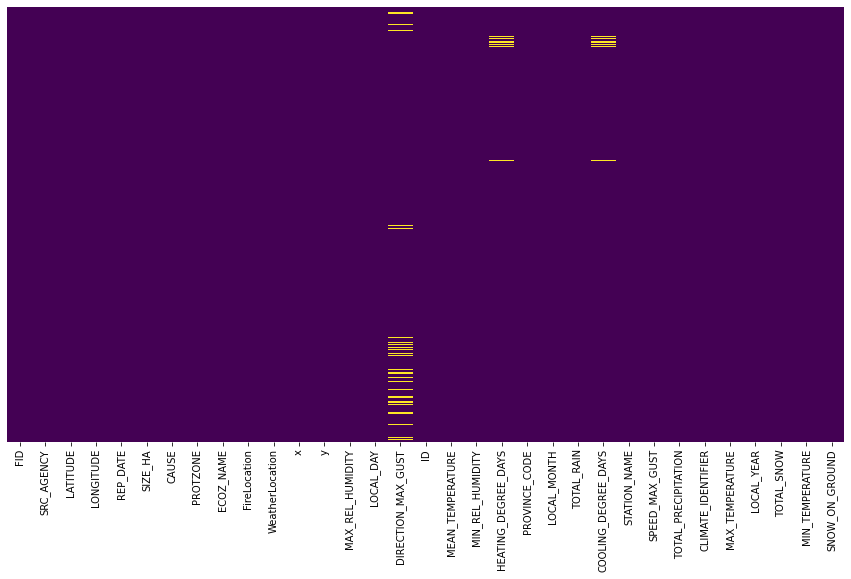

In [37]:
plt.figure(figsize=(15,8))
ax =sns.heatmap(merged_df8.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [38]:
merged_df8.drop(columns=['HEATING_DEGREE_DAYS', 'COOLING_DEGREE_DAYS'], axis =1, inplace = True)

In [39]:
merged_df8.drop(columns=['DIRECTION_MAX_GUST'], axis =1, inplace = True)

In [40]:
merged_df8_copy = merged_df8.copy()
groupby_max_mean_df = (
    merged_df8_copy
    .groupby(['FireLocation'])
    .agg({'MAX_TEMPERATURE':'max'})
)
for i in range(int(len(groupby_max_mean_df))):
    merged_df8['MAX_TEMPERATURE'].replace(merged_df8.iloc[15*i]['MAX_TEMPERATURE'],groupby_max_mean_df.iloc[i]['MAX_TEMPERATURE'],inplace =True)
    

In [41]:
groupby_min_mean_df = (
    merged_df8_copy
    .groupby(['FireLocation'])
    .agg({'MIN_TEMPERATURE':'min'})
)
for i in range(int(len(groupby_min_mean_df))):
    merged_df8['MIN_TEMPERATURE'].replace(merged_df8.iloc[15*i]['MIN_TEMPERATURE'],groupby_min_mean_df.iloc[i]['MIN_TEMPERATURE'],inplace =True)

In [42]:
groupby_mean_mean_df = (
    merged_df8_copy
    .groupby(['FireLocation'])
    .agg({'MEAN_TEMPERATURE':'mean'})
)
for i in range(int(len(groupby_mean_mean_df))):
    merged_df8['MEAN_TEMPERATURE'].replace(merged_df8.iloc[15*i]['MEAN_TEMPERATURE'],groupby_mean_mean_df.iloc[i]['MEAN_TEMPERATURE'],inplace =True)

In [43]:
groupby_min_humid_df = (
    merged_df8_copy
    .groupby(['FireLocation'])
    .agg({'MIN_REL_HUMIDITY':'mean'})
)
for i in range(int(len(groupby_min_humid_df))):
    merged_df8['MIN_REL_HUMIDITY'].replace(merged_df8.iloc[15*i]['MIN_REL_HUMIDITY'],groupby_min_humid_df.iloc[i]['MIN_REL_HUMIDITY'],inplace =True)

In [44]:
groupby_max_humid_df = (
    merged_df8_copy
    .groupby(['FireLocation'])
    .agg({'MAX_REL_HUMIDITY':'mean'})
)
for i in range(int(len(groupby_max_humid_df))):
    merged_df8['MAX_REL_HUMIDITY'].replace(merged_df8.iloc[15*i]['MAX_REL_HUMIDITY'],groupby_max_humid_df.iloc[i]['MAX_REL_HUMIDITY'],inplace =True)

In [45]:
groupby_total_rain_df = (
    merged_df8_copy
    .groupby(['FireLocation'])
    .agg({'TOTAL_RAIN':'sum'})
)
for i in range(int(len(groupby_total_rain_df))):
    merged_df8['TOTAL_RAIN'].replace(merged_df8.iloc[15*i]['TOTAL_RAIN'],groupby_total_rain_df.iloc[i]['TOTAL_RAIN'],inplace =True)

In [46]:
groupby_total_snow_df = (
    merged_df8_copy
    .groupby(['FireLocation'])
    .agg({'TOTAL_SNOW':'sum'})
)
for i in range(int(len(groupby_total_snow_df))):
    merged_df8['TOTAL_SNOW'].replace(merged_df8.iloc[15*i]['TOTAL_SNOW'],groupby_total_snow_df.iloc[i]['TOTAL_SNOW'],inplace =True)

In [47]:
groupby_total_prep_df = (
    merged_df8_copy
    .groupby(['FireLocation'])
    .agg({'TOTAL_PRECIPITATION':'sum'})
)
for i in range(int(len(groupby_total_prep_df))):
    merged_df8['TOTAL_PRECIPITATION'].replace(merged_df8.iloc[15*i]['TOTAL_PRECIPITATION'],groupby_total_prep_df.iloc[i]['TOTAL_PRECIPITATION'],inplace =True)

In [48]:
remove_index = [index for index in merged_df8.index if index%15!=0]

In [49]:
merged_df8.drop(remove_index, inplace = True)

In [50]:
fire_0_df = merged_df8.copy().reset_index()
fire_0_df

,index,FID,SRC_AGENCY,LATITUDE,LONGITUDE,REP_DATE,SIZE_HA,CAUSE,PROTZONE,ECOZ_NAME,...,TOTAL_RAIN,STATION_NAME,SPEED_MAX_GUST,TOTAL_PRECIPITATION,CLIMATE_IDENTIFIER,MAX_TEMPERATURE,LOCAL_YEAR,TOTAL_SNOW,MIN_TEMPERATURE,SNOW_ON_GROUND
0,0,328420,QC,52.5747,-76.5213,2019-06-01,0.0,L,nordique,Hudson Plain,...,0.0,LA GRANDE RIVIERE A,43.300000,0.0,7093716,14.3,2019.0,0.0,-4.1,0.0
1,15,328421,QC,52.573,-76.5418,2019-06-01,0.0,L,nordique,Hudson Plain,...,0.0,LA GRANDE RIVIERE A,43.300000,0.0,7093716,14.3,2019.0,0.0,-4.1,0.0
2,120,328451,QC,49.1275,-65.2352,2019-06-28,0.0,L,intensive,Atlantic Maritime,...,0.0,CAP-MADELEINE,49.500000,0.0,7051163,14.3,2019.0,0.0,-4.1,0.0
3,225,328573,QC,48.7306,-64.9126,2019-06-28,0.0,L,intensive,Atlantic Maritime,...,0.0,GASPE A,44.416667,4.3,7052601,14.3,2019.0,0.0,-4.1,0.0
4,345,328876,QC,53.0048,-77.4008,2019-06-01,0.0,L,nordique,Taiga Shield East,...,0.0,LA GRANDE RIVIERE A,43.300000,0.0,7093716,14.3,2019.0,0.0,-4.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,16620,371372,QC,55.3554,-76.0912,2021-05-25,0.0,L,nordique,Taiga Shield East,...,0.0,UMIUJAQ A,91.000000,0.0,7108564,8.0,2021.0,0.0,-4.1,0.0
267,16650,371382,QC,49.7934,-78.9444,2021-06-06,0.0,L,intensive,Boreal Shield East,...,0.0,MATAGAMI,37.000000,0.0,7094637,29.9,2021.0,0.0,-4.1,0.0
268,16740,371401,QC,48.7492,-72.7857,2021-06-26,0.0,L,intensive,Boreal Shield East,...,0.0,NORMANDIN,33.000000,11.9,7065639,14.3,2021.0,0.0,-12.5,0.0
269,16830,371444,QC,49.1904,-76.6467,2021-07-09,0.0,L,intensive,Boreal Shield East,...,0.0,MATAGAMI,37.000000,0.0,7094637,24.4,2021.0,0.0,-7.4,0.0


In [51]:
fire_0_df.drop(columns = 'index' ,axis=1, inplace = True)

In [52]:
fire_0_df['Class'] = 0

In [53]:
fire_0_df

,FID,SRC_AGENCY,LATITUDE,LONGITUDE,REP_DATE,SIZE_HA,CAUSE,PROTZONE,ECOZ_NAME,FireLocation,...,STATION_NAME,SPEED_MAX_GUST,TOTAL_PRECIPITATION,CLIMATE_IDENTIFIER,MAX_TEMPERATURE,LOCAL_YEAR,TOTAL_SNOW,MIN_TEMPERATURE,SNOW_ON_GROUND,Class
0,328420,QC,52.5747,-76.5213,2019-06-01,0.0,L,nordique,Hudson Plain,"(52.5747, -76.52129999999998)",...,LA GRANDE RIVIERE A,43.300000,0.0,7093716,14.3,2019.0,0.0,-4.1,0.0,0
1,328421,QC,52.573,-76.5418,2019-06-01,0.0,L,nordique,Hudson Plain,"(52.573, -76.54179999999998)",...,LA GRANDE RIVIERE A,43.300000,0.0,7093716,14.3,2019.0,0.0,-4.1,0.0,0
2,328451,QC,49.1275,-65.2352,2019-06-28,0.0,L,intensive,Atlantic Maritime,"(49.1275, -65.2352)",...,CAP-MADELEINE,49.500000,0.0,7051163,14.3,2019.0,0.0,-4.1,0.0,0
3,328573,QC,48.7306,-64.9126,2019-06-28,0.0,L,intensive,Atlantic Maritime,"(48.7306, -64.9126)",...,GASPE A,44.416667,4.3,7052601,14.3,2019.0,0.0,-4.1,0.0,0
4,328876,QC,53.0048,-77.4008,2019-06-01,0.0,L,nordique,Taiga Shield East,"(53.0048, -77.4008)",...,LA GRANDE RIVIERE A,43.300000,0.0,7093716,14.3,2019.0,0.0,-4.1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,371372,QC,55.3554,-76.0912,2021-05-25,0.0,L,nordique,Taiga Shield East,"(55.3554, -76.0912)",...,UMIUJAQ A,91.000000,0.0,7108564,8.0,2021.0,0.0,-4.1,0.0,0
267,371382,QC,49.7934,-78.9444,2021-06-06,0.0,L,intensive,Boreal Shield East,"(49.7934, -78.9444)",...,MATAGAMI,37.000000,0.0,7094637,29.9,2021.0,0.0,-4.1,0.0,0
268,371401,QC,48.7492,-72.7857,2021-06-26,0.0,L,intensive,Boreal Shield East,"(48.7492, -72.7857)",...,NORMANDIN,33.000000,11.9,7065639,14.3,2021.0,0.0,-12.5,0.0,0
269,371444,QC,49.1904,-76.6467,2021-07-09,0.0,L,intensive,Boreal Shield East,"(49.1904, -76.64669999999998)",...,MATAGAMI,37.000000,0.0,7094637,24.4,2021.0,0.0,-7.4,0.0,0


In [54]:
fire_0_df.columns

Index(['FID', 'SRC_AGENCY', 'LATITUDE', 'LONGITUDE', 'REP_DATE', 'SIZE_HA',
       'CAUSE', 'PROTZONE', 'ECOZ_NAME', 'FireLocation', 'WeatherLocation',
       'x', 'y', 'MAX_REL_HUMIDITY', 'LOCAL_DAY', 'ID', 'MEAN_TEMPERATURE',
       'MIN_REL_HUMIDITY', 'PROVINCE_CODE', 'LOCAL_MONTH', 'TOTAL_RAIN',
       'STATION_NAME', 'SPEED_MAX_GUST', 'TOTAL_PRECIPITATION',
       'CLIMATE_IDENTIFIER', 'MAX_TEMPERATURE', 'LOCAL_YEAR', 'TOTAL_SNOW',
       'MIN_TEMPERATURE', 'SNOW_ON_GROUND', 'Class'],
      dtype='object')

In [55]:
fire_0_df['LOCAL_MONTH'].unique()

array([6., 7., 5., 4., 8.])

In [56]:
fire_0_df['LOCAL_DAY'].unique()

array([ 1., 28.,  3., 12., 19.,  6., 13., 25., 11.,  7.,  2., 29.,  4.,
       18.,  5., 24., 27., 10., 16., 15., 23.,  9., 20., 21., 22., 30.,
       14., 17.,  8., 31., 26.])

In [57]:
fire_0_df['MEAN_TEMPERATURE'].unique()

array([ 1.75      ,  5.64666667, 15.73333333, 11.6       , 16.67333333,
        9.72666667,  4.        ,  6.2       , 13.4       ,  5.3       ,
        9.7       , 10.1       , 17.34666667,  3.9       , 11.5       ,
        8.04      ,  6.9       ,  9.9       ,  0.1       ,  2.4       ,
        6.7       , 11.7       , 16.1       ,  5.02      , 15.11333333,
       16.09333333,  6.3       , 11.2       , 15.4       ,  5.98666667,
        5.18666667, -1.08666667,  7.66666667, 12.2       , 12.51333333,
        0.6       , 17.32666667, -0.18      , 16.47333333, 23.4       ,
       24.9       , 14.25333333,  9.22      ,  4.6       ,  2.5       ,
       -3.3       , 14.7       , 14.8       , -0.2       , 21.7       ,
        5.28666667, 15.42      ,  7.1       , 19.4       , 15.6       ,
       15.5       ,  5.83333333, 19.3       ,  8.4       , 13.62666667,
        3.5       ,  0.5       ,  3.52      , 17.5       , 22.1       ,
       20.9       , -5.2       ,  5.11      , -6.2       , 14.9 

In [58]:
fire_0_df['TOTAL_PRECIPITATION'].unique()

array([ 0. ,  4.3,  7.9, 10.8,  5.4,  6.8,  1.9, 26.5,  5.5,  2.2,  2.6,
        1.7, 11.7, 99.5,  2.3,  0.6,  6.4, 16. , 11.3, 12.3, 16.2, 11.9])

In [59]:
fire_0_df['MAX_TEMPERATURE'].unique()

array([14.3       , 20.2       ,  7.5       , 15.11666667, 12.47272727,
       19.        , 18.8       , 12.4       , 27.5       , 23.8       ,
       14.        , 19.1       , 10.6       ,  4.7       ,  9.5       ,
       14.6       , 15.        , 10.        , 26.5       , 12.1       ,
       20.8       , 28.5       , 30.        , 21.4       , 22.7       ,
       18.9       , 11.7       , 13.7       , 20.5       , 12.2       ,
       19.2       , 21.        , 18.3       , 27.9       ,  5.1       ,
        2.8       , 15.4       , 13.9       ,  1.9       , 12.        ,
       25.5       , 24.6       , 29.1       ,  9.1       ,  6.1       ,
        4.1       , 23.9       , 30.9       , 25.8       , 18.4       ,
        1.8       , -1.2       ,  4.4       , -1.        , 22.3       ,
        7.4       , 13.        , 11.2       , 35.5       ,  6.5       ,
        4.5       ,  7.8       ,  6.9       ,  9.2       ,  7.7       ,
        8.5       , 23.2       ,  8.        , 29.9       , 24.4 

In [60]:
fire_0_df['MIN_TEMPERATURE'].unique()

array([ -4.1,  12.2,   1.1,   3.2,   3.6,   1.7,  -6.3,   7.5,   3.7,
         1.5,  -4.6,  -4.8,  -1.6,  -1.8,  -5.4,   4.7,  12.5,   0.2,
         6.1,  13.7,   4.9,  13.5,  10. ,  11.2,  11.3, -12.3,   5.1,
        17.3,   6. ,   1. ,   8.8,   8.7,  15.6,  17.4, -12.5,  11.9,
        -0.2,   4.6,  11.4,   8.3,  13.3,   5.7,  14.8,   0.9,   9.8,
        11. ,  15.3,  15.5,  -9.4, -11.4,  11.5,  -1.1,  -7.4])

In [61]:
fire_0_df.to_csv('fire_0_df.csv')